# REGRESIÓN  - FUNCION RENTABILIDAD ECONOMICA

INTENTAR PREDECIR EL VALOR DE LA RENTABILIDAD ECONOMICA A PARTIR DEL VECTOR TODOS LOS DEMAS

In [ ]:
import pandas as pd
import csv

mainpath = '/Users/sarasotoandreu/Documents/TFG (nueva muestra)/datos_sin_balanceo.txt'
datos = pd.read_csv(mainpath)

In [ ]:
#Crear todas las columnas
datos_regresion = pd.DataFrame()

datos_regresion['media_rentabilidad_economica'] = datos['media_rentabilidad_economica']

nombres_columnas = ['columna{}'.format(i) for i in range(1, 1536+1)]

# Agregar las columnas al DataFrame con valores vacíos
for columna in nombres_columnas:
    datos_regresion[columna] = None

In [ ]:
#No ejecutar 
for fila in range(len(datos_regresion)):
    vector = datos['v_embedding'][fila]
    for i in range(len(vector)):
        datos_regresion['columna{}'.format(i+1)][fila] = vector[i]

In [ ]:
#Lo guardamos
mainpath = "/Users/sarasotoandreu/Documents/TFG (nueva muestra)/"
datos_regresion.to_csv(mainpath + 'datos_regresion.txt', sep=",")

### --------------------------------------------------------------------------------------------------------------------------------

In [1]:
#Lo volvemos a abrir
import pandas as pd
import csv

mainpath = '/Users/sarasotoandreu/Documents/TFG (nueva muestra)/datos_regresion.txt'
datos_regresion = pd.read_csv(mainpath)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
datos_regresion.columns
y = datos_regresion['media_rentabilidad_economica']
X = datos_regresion.iloc[:, 2:]

In [4]:
# Crear y ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [5]:
# Hacer predicciones utilizando el modelo entrenado
y_pred = regression_model.predict(X)

In [6]:
# Obtener los coeficientes del modelo
coeficientes = regression_model.coef_

In [7]:
# Obtener el intercepto del modelo
intercepto = regression_model.intercept_

In [8]:
# Imprimir los coeficientes y el intercepto
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto) #Si todas las variables valen 0 que vale y?

Coeficientes: [250.97161129 235.14903371 297.24324313 ... 225.79891476 269.79551212
 166.08463875]
Intercepto: -109.72334004676438


In [9]:
# Calcular métricas de evaluación
mad = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Imprimir los resultados
print("Diferencia absoluta media (MAD):", mad)
print("Error cuadrático medio (RMSE):", rmse)

Diferencia absoluta media (MAD): 4.060995793672093
Error cuadrático medio (RMSE): 5.587008457818901


In [10]:
y_pred = y_pred.tolist()

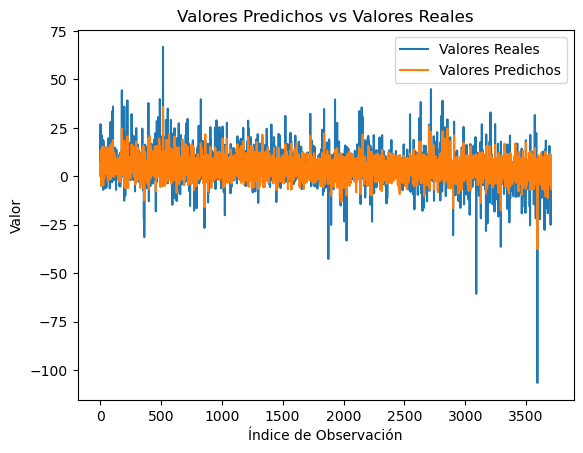

In [23]:
import matplotlib.pyplot as plt


# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los valores reales y predichos
ax.plot(y, label='Valores Reales')
ax.plot(y_pred, label='Valores Predichos')

# Agregar etiquetas de ejes y título
ax.set_xlabel('Índice de Observación')
ax.set_ylabel('Valor')
ax.set_title('Valores Predichos vs Valores Reales')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

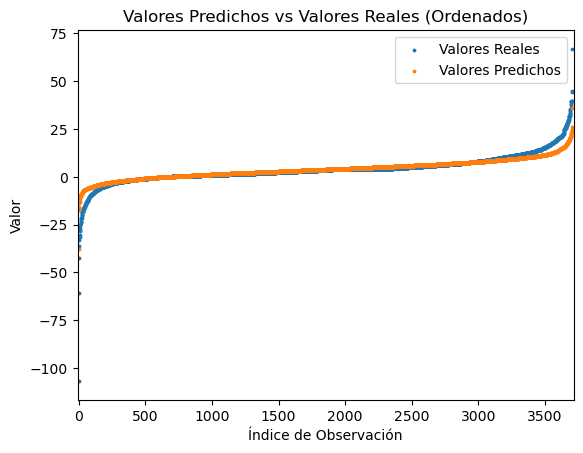

In [15]:
#Grafico de dispersion
import matplotlib.pyplot as plt
import numpy as np

y_sorted = np.sort(y)
y_pred_sorted = np.sort(y_pred)

fig, ax = plt.subplots()
ax.scatter(range(len(y_sorted)), y_sorted, label='Valores Reales', s=3) 
ax.scatter(range(len(y_pred_sorted)), y_pred_sorted, label='Valores Predichos', s=3) 


ax.set_xlabel('Índice de Observación')
ax.set_ylabel('Valor')
ax.set_title('Valores Predichos vs Valores Reales (Ordenados)')


ax.set_xlim([-10, len(y_sorted) + 10])  
ax.set_ylim([min(min(y_sorted), min(y_pred_sorted)) - 10, max(max(y_sorted), max(y_pred_sorted)) + 10])   

ax.legend()

plt.show()

In [29]:
print(y_pred[1:10])

[6.151130147332736, -0.08665800279790403, 3.05870047127992, 6.976809105446264, 5.9710533570724635, 13.505535909470069, 4.491774951573163, 1.8626951530369382, 0.6964337896610147]


In [28]:
print(y[1:10])

1     8.045400
2     2.900400
3     4.121000
4    26.866200
5     3.963043
6    21.844600
7     0.776000
8     5.756400
9     5.169000
Name: media_rentabilidad_economica, dtype: float64
